In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor
from sklearn.ensemble import IsolationForest


city_df = pd.read_csv(r'C:\Users\Frank\Desktop\PCIC\Tercer Semestre\MX_ciudades.csv', header = None, sep = '\t', on_bad_lines = 'skip')
city_df = city_df.rename(columns = {0:"x", 1:"y", 2:"Nombre"})
city_df.head()

,x,y,Nombre
0,0.603244,0.460621,Gustavo A. Madero
1,0.623385,0.569956,San Fernando
2,0.608631,0.646459,Gustavo Díaz Ordaz
3,0.592009,0.290783,Zumpango
4,0.577937,0.172304,Zumpango del Río


In [2]:
x_aux = [(city_df['x'][_], city_df['y'][_]) for _ in range(len(city_df['x']))]

In [7]:
def full_LOF(n_neighbors, ax):
    clf = LocalOutlierFactor(n_neighbors=n_neighbors)
    a = list(clf.fit_predict(x_aux))
    print('n_neighbors={}: Cantidad de anomalías: {} | Cantidad de ciudades normales: {}'.format(
        n_neighbors, a.count(-1), a.count(1)))
    
    anom_index = []
    for i in range(len(a)):
        if a[i] == -1:
            anom_index.append(i)
    
    normal_city = [(city_df['x'][_], city_df['y'][_]) if _ not in anom_index else None for _ in range(len(city_df['x']))]
    norm_city = list(set(normal_city))
    norm_city.remove(None)
    
    anomally_city = [(city_df['x'][_], city_df['y'][_]) if _ in anom_index else None for _ in range(len(city_df['x']))]
    anom_city = list(set(anomally_city))
    anom_city.remove(None)
    
    norm_city_x = [norm_city[_][0] for _ in range(len(norm_city))]
    norm_city_y = [norm_city[_][1] for _ in range(len(norm_city))]
    
    anom_city_x = [anom_city[_][0] for _ in range(len(anom_city))]
    anom_city_y = [anom_city[_][1] for _ in range(len(anom_city))]
    
    ax.plot(norm_city_x, norm_city_y, 'x', color='blue', label='Normal', markersize=6)
    ax.plot(anom_city_x, anom_city_y, '.', color='red', label='Anomalía', markersize=8)
    ax.set_title('n_neighbors = {}'.format(n_neighbors), fontsize=10)
    ax.legend(loc='best', fontsize=8)
    ax.grid(True, alpha=0.3)
    return anom_index

n_neighbors=1: Cantidad de anomalías: 258 | Cantidad de ciudades normales: 761
n_neighbors=2: Cantidad de anomalías: 184 | Cantidad de ciudades normales: 835
n_neighbors=3: Cantidad de anomalías: 106 | Cantidad de ciudades normales: 913
n_neighbors=4: Cantidad de anomalías: 97 | Cantidad de ciudades normales: 922
n_neighbors=5: Cantidad de anomalías: 86 | Cantidad de ciudades normales: 933
n_neighbors=6: Cantidad de anomalías: 62 | Cantidad de ciudades normales: 957
n_neighbors=7: Cantidad de anomalías: 60 | Cantidad de ciudades normales: 959
n_neighbors=8: Cantidad de anomalías: 75 | Cantidad de ciudades normales: 944
n_neighbors=9: Cantidad de anomalías: 76 | Cantidad de ciudades normales: 943
n_neighbors=10: Cantidad de anomalías: 78 | Cantidad de ciudades normales: 941
n_neighbors=11: Cantidad de anomalías: 60 | Cantidad de ciudades normales: 959
n_neighbors=12: Cantidad de anomalías: 66 | Cantidad de ciudades normales: 953
n_neighbors=13: Cantidad de anomalías: 71 | Cantidad de ci

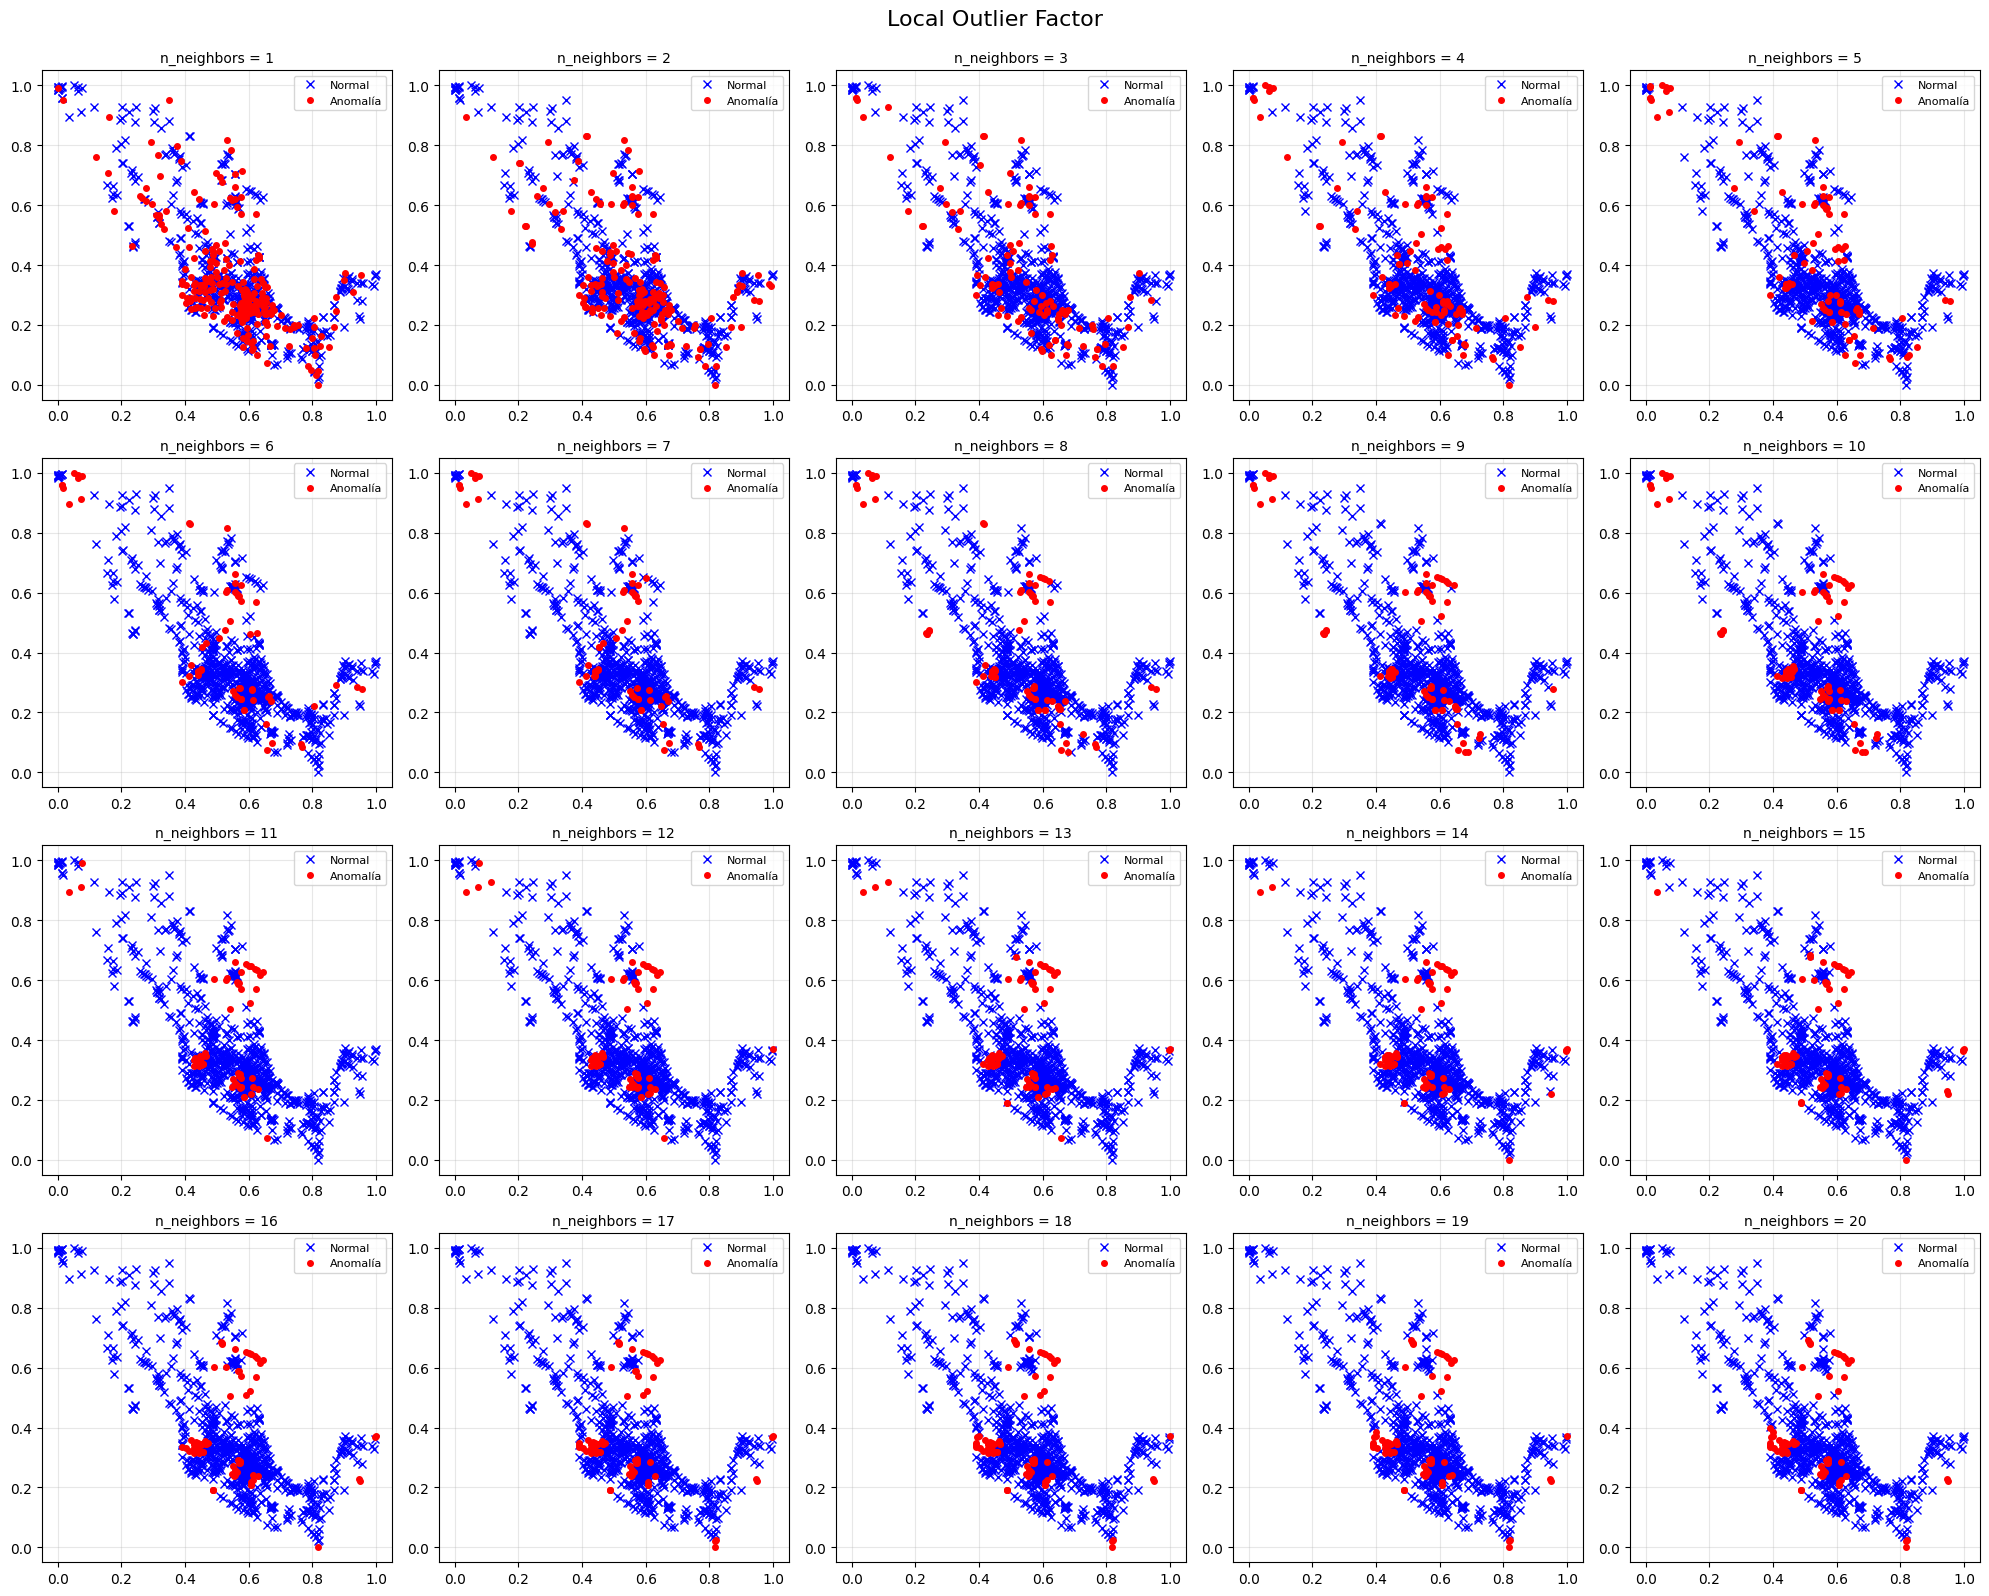

In [17]:
fig, axes = plt.subplots(4, 5, figsize=(20, 16))
axes = axes.flatten()

const_anom = [i for i in range(len(x_aux))]
for i in range(1, 21):
    aux = full_LOF(i, axes[i-1])
    for i in const_anom:
        if i not in aux:
            const_anom.remove(i)

print('Cantidad de ciudades que siempre son anomalías: {}'.format(len(const_anom)))
print(city_df.iloc[const_anom[0]])


plt.suptitle('Local Outlier Factor', fontsize=16, y=0.995)
plt.tight_layout()
plt.show()

In [18]:
def full_IF(n_estimators, ax):
    a = list(IsolationForest(n_estimators=n_estimators).fit_predict(x_aux))
    print('Estimators={}: Cantidad de anomalías: {} | Cantidad de ciudades normales: {}'.format(n_estimators, a.count(-1), a.count(1)))
    
    anom_index = []
    for i in range(len(a)):
        if a[i] == -1:
            anom_index.append(i)
    
    normal_city = [(city_df['x'][_], city_df['y'][_]) if _ not in anom_index else None for _ in range(len(city_df['x']))]
    norm_city = list(set(normal_city))
    norm_city.remove(None)
    
    anomally_city = [(city_df['x'][_], city_df['y'][_]) if _ in anom_index else None for _ in range(len(city_df['x']))]
    anom_city = list(set(anomally_city))
    anom_city.remove(None)
    
    norm_city_x = [norm_city[_][0] for _ in range(len(norm_city))]
    norm_city_y = [norm_city[_][1] for _ in range(len(norm_city))]
    
    anom_city_x = [anom_city[_][0] for _ in range(len(anom_city))]
    anom_city_y = [anom_city[_][1] for _ in range(len(anom_city))]
    
    ax.plot(norm_city_x, norm_city_y, 'x', color='blue', label='Normal', markersize=6)
    ax.plot(anom_city_x, anom_city_y, '.', color='red', label='Anomalía', markersize=8)
    ax.set_title('n_estimators = {}'.format(n_estimators), fontsize=10)
    ax.legend(loc='best', fontsize=8)
    ax.grid(True, alpha=0.3)
    return anom_index

Estimators=2: Cantidad de anomalías: 364 | Cantidad de ciudades normales: 655
Estimators=5: Cantidad de anomalías: 239 | Cantidad de ciudades normales: 780
Estimators=10: Cantidad de anomalías: 332 | Cantidad de ciudades normales: 687
Estimators=20: Cantidad de anomalías: 229 | Cantidad de ciudades normales: 790
Estimators=50: Cantidad de anomalías: 235 | Cantidad de ciudades normales: 784
Cantidad de ciudades que siempre son anomalías: 202
¿Valle de Bravo es una de las anomalías consistentes?: False


C:\Users\Frank\AppData\Local\Temp\ipykernel_13360\3712847792.py:24: UserWarning: tight_layout not applied: number of columns in subplot specifications must be multiples of one another.
  plt.tight_layout()


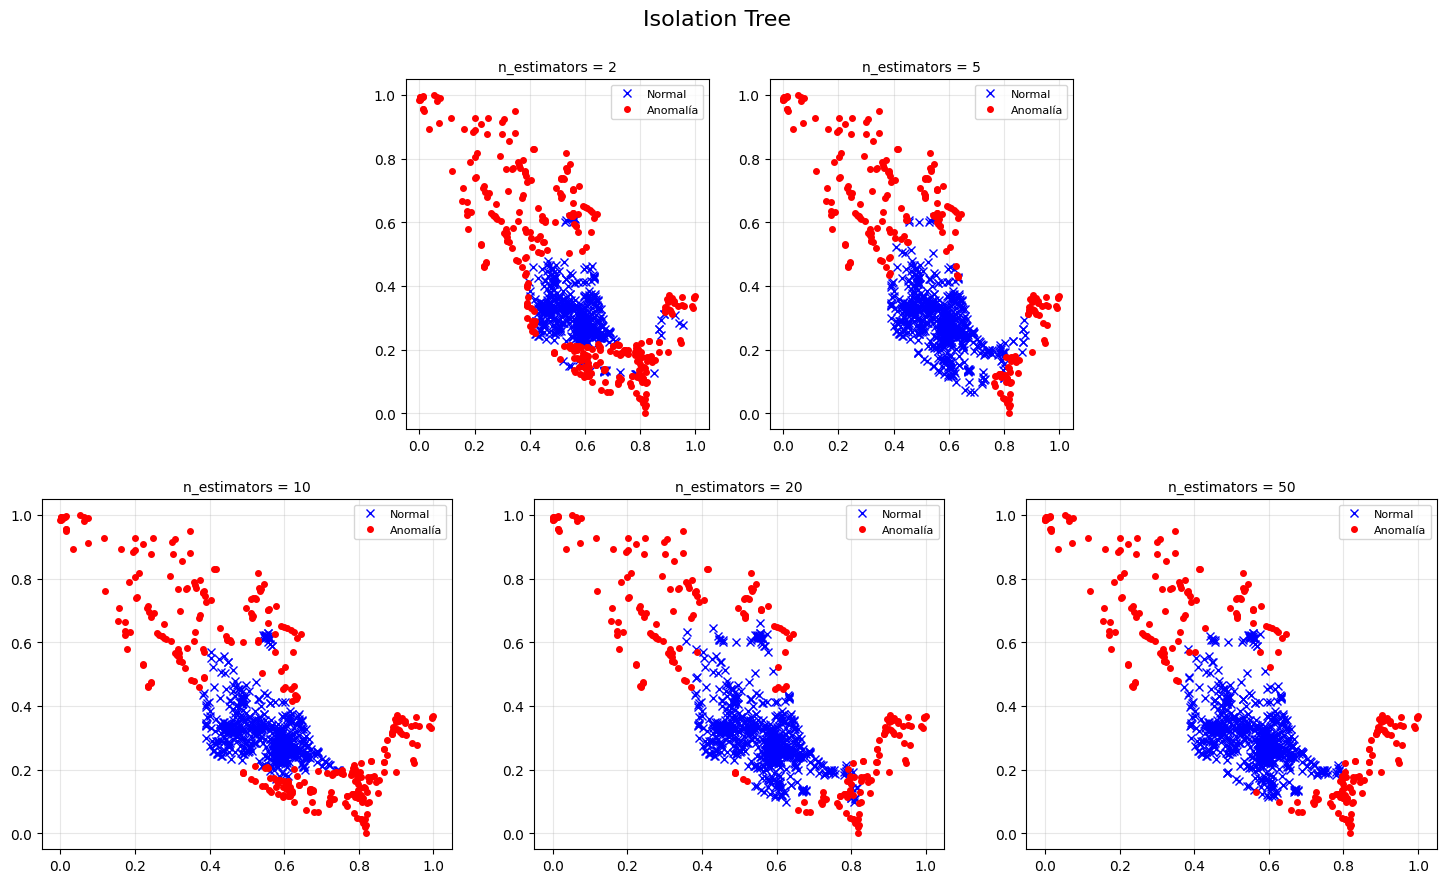

In [24]:
fig = plt.figure(figsize=(18, 10))

if_values = [2, 5, 10, 20, 50]
const_anom = [i for i in range(len(x_aux))]
for i in range(1, 3):
    ax = plt.subplot(2, 4, i + 1)
    aux = full_IF(if_values[i-1], ax)
    for i in const_anom:
        if i not in aux:
            const_anom.remove(i)

for i in range(3, 6):
    ax = plt.subplot(2, 3, i + 1)
    aux = full_IF(if_values[i-1], ax)
    for i in const_anom:
        if i not in aux:
            const_anom.remove(i)

print('Cantidad de ciudades que siempre son anomalías: {}'.format(len(const_anom)))
name_aux = [city_df['Nombre'][_] for _ in const_anom]
print('¿Valle de Bravo es una de las anomalías consistentes?: {}'.format('Valle de Bravo' in name_aux))

plt.suptitle('Isolation Tree', fontsize=16, y=0.95)
plt.tight_layout()
plt.show()